## Pré-Processamentos dos dados do Enade 2017 referentes aos cursos de Ciência da Computação das universidades/faculdades do nordeste

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Dados do Enade 2017 (Cursos de computação das universidades/faculdades do nordeste)
#df = pd.read_csv('dados/computacao_ne_enade2017.csv')
enade_ccc_ufcg = pd.read_csv('dados/enade2017_computacao_ufcg.csv')

In [3]:
# Separando apenas os campos necessários
df = enade_ccc_ufcg[['CO_IES', 'Instituicao', 'CO_CATEGAD', 'CO_CURSO', 'NO_CURSO', 'Municipio',
                     'UF', 'TP_SEXO', 'NU_IDADE', 'QE_I01', 'QE_I02', 'QE_I04', 'QE_I05', 
                     'QE_I06', 'QE_I07', 'QE_I08', 'QE_I09', 'QE_I10', 'QE_I11', 'QE_I12', 
                     'QE_I13', 'QE_I14', 'QE_I15', 'QE_I17', 'QE_I18', 'QE_I19', 'QE_I20', 
                     'QE_I21', 'QE_I22', 'QE_I23', 'QE_I24', 'QE_I25', 'QE_I26', 'NT_GER']]
df.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,B,B,C,B,A,C,A,E,F,57.4
1,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,A,B,C,A,B,C,A,H,A,35.7
2,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,29,A,...,A,A,B,B,A,E,E,E,C,29.5
3,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,31,A,...,A,B,F,A,E,E,E,E,C,44.0
4,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,A,A,K,A,C,C,E,H,I,61.4


In [4]:
# Exibindo o cabeçalho do dataframe
df.head()

,CO_IES,Instituicao,CO_CATEGAD,CO_CURSO,NO_CURSO,Municipio,UF,TP_SEXO,NU_IDADE,QE_I01,...,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,NT_GER
0,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,B,B,C,B,A,C,A,E,F,57.4
1,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,A,B,C,A,B,C,A,H,A,35.7
2,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,29,A,...,A,A,B,B,A,E,E,E,C,29.5
3,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,31,A,...,A,B,F,A,E,E,E,E,C,44.0
4,2564,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),1,13446,CIÊNCIA DA COMPUTAÇÃO,Campina Grande,PB,M,24,A,...,A,A,K,A,C,C,E,H,I,61.4


In [5]:
# Exibindo o tamanho do dataframe
df.shape

(69, 34)

In [6]:
# Exibindo as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 34 columns):
CO_IES         69 non-null int64
Instituicao    69 non-null object
CO_CATEGAD     69 non-null int64
CO_CURSO       69 non-null int64
NO_CURSO       69 non-null object
Municipio      69 non-null object
UF             69 non-null object
TP_SEXO        69 non-null object
NU_IDADE       69 non-null int64
QE_I01         69 non-null object
QE_I02         69 non-null object
QE_I04         69 non-null object
QE_I05         69 non-null object
QE_I06         69 non-null object
QE_I07         69 non-null object
QE_I08         69 non-null object
QE_I09         69 non-null object
QE_I10         69 non-null object
QE_I11         69 non-null object
QE_I12         69 non-null object
QE_I13         69 non-null object
QE_I14         69 non-null object
QE_I15         69 non-null object
QE_I17         69 non-null object
QE_I18         69 non-null object
QE_I19         69 non-null object
QE_I20         69

In [7]:
# Exibindo a quantidade de valores faltantes por coluna
df.isnull().sum()

CO_IES         0
Instituicao    0
CO_CATEGAD     0
CO_CURSO       0
NO_CURSO       0
Municipio      0
UF             0
TP_SEXO        0
NU_IDADE       0
QE_I01         0
QE_I02         0
QE_I04         0
QE_I05         0
QE_I06         0
QE_I07         0
QE_I08         0
QE_I09         0
QE_I10         0
QE_I11         0
QE_I12         0
QE_I13         0
QE_I14         0
QE_I15         0
QE_I17         0
QE_I18         0
QE_I19         0
QE_I20         0
QE_I21         0
QE_I22         0
QE_I23         0
QE_I24         0
QE_I25         0
QE_I26         0
NT_GER         2
dtype: int64

Podemos perceber, acima, que alguns atributos estão com dados faltantes. Para melhor visualizar esses dados vejamos a visualização abaixo.

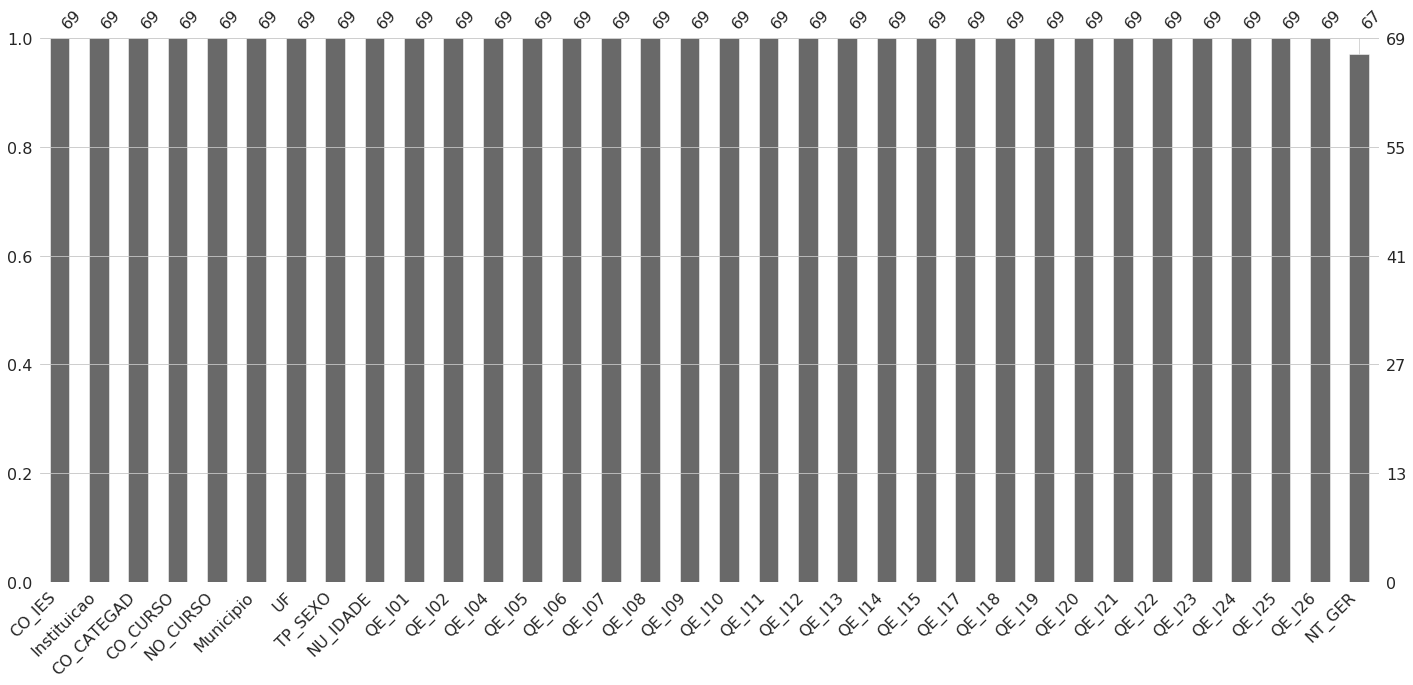

In [8]:
# Exibindo as colunas com valores faltantes
# msno.matrix(df)
fig, ax = plt.subplots(figsize=(12,6))
ax = msno.bar(df)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [9]:
# Remover linhas com dados faltantes (Incluíndo, agora, as linhas que apresentam as características:
# Resposta anulada e/ou Não Respondeu)
df = df.dropna()

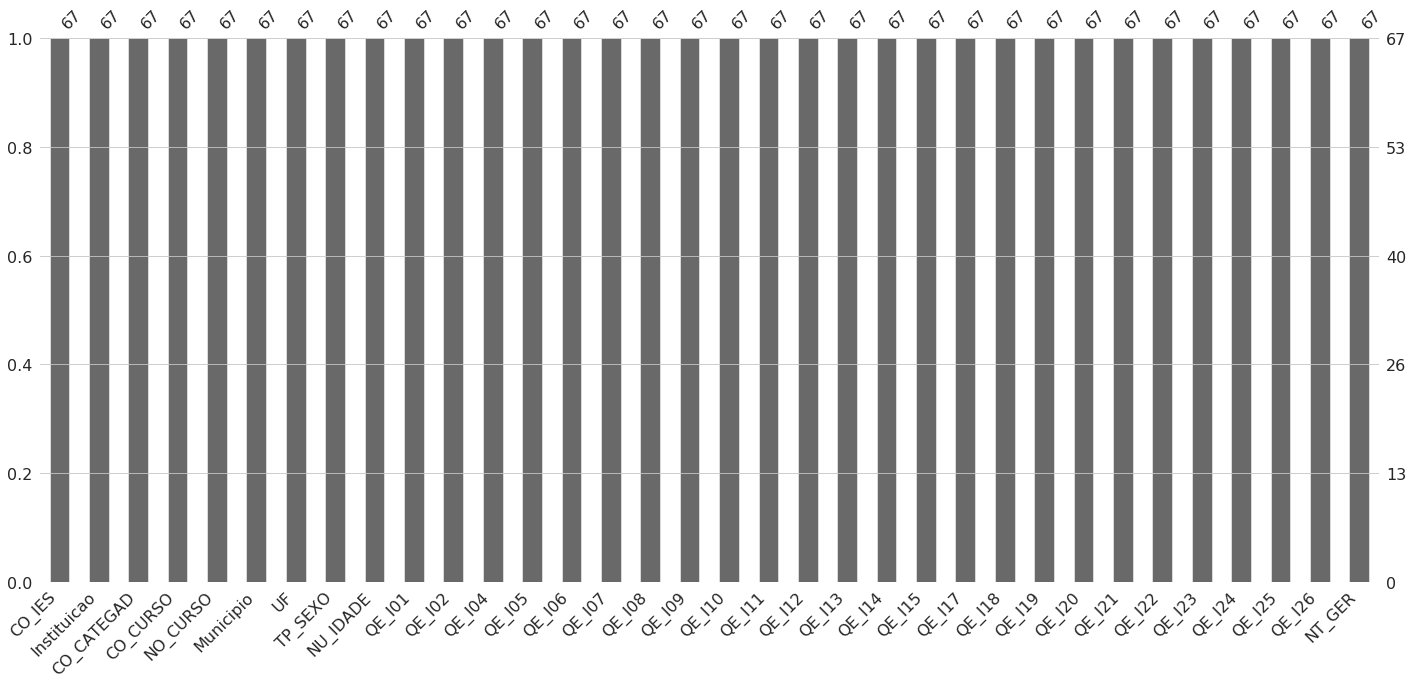

In [10]:
# Exibindo as colunas após a remoção das linhas com valores faltantes
msno.bar(df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 68
Data columns (total 34 columns):
CO_IES         67 non-null int64
Instituicao    67 non-null object
CO_CATEGAD     67 non-null int64
CO_CURSO       67 non-null int64
NO_CURSO       67 non-null object
Municipio      67 non-null object
UF             67 non-null object
TP_SEXO        67 non-null object
NU_IDADE       67 non-null int64
QE_I01         67 non-null object
QE_I02         67 non-null object
QE_I04         67 non-null object
QE_I05         67 non-null object
QE_I06         67 non-null object
QE_I07         67 non-null object
QE_I08         67 non-null object
QE_I09         67 non-null object
QE_I10         67 non-null object
QE_I11         67 non-null object
QE_I12         67 non-null object
QE_I13         67 non-null object
QE_I14         67 non-null object
QE_I15         67 non-null object
QE_I17         67 non-null object
QE_I18         67 non-null object
QE_I19         67 non-null object
QE_I20         67

In [12]:
# Salvando o dataframe resultante
df.to_csv('dados/enade2017_ccc_ufcg_prep.csv', index=False)